# Linear Regression
- Used in Prediction of a value of a certain point in infinite range given a large dataset for this value.
- We have two main parameters x_train, y_train:
  - x_train is the value of the features we know.
  - y_train is value of the features we try to predict.

### Tools

- Pandas.
  - In the examples here we don't use pandas as we input the dataset manually, you will use it to read from csv files.
- Numpy.
- Matplotlib.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Training Data

This is an example of House Price Prediction model with a simple dataset with 2 features:

    - Size of the house in feet square.
    - Price of the house in thousands of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |


In [17]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

print(f'x_train: {x_train}, y_train: {y_train}')

# size of the training data
x_shape = x_train.shape[0]

print(f'Training data size: {x_shape}')

x_train: [1. 2.], y_train: [300. 500.]
Training data size: 2


### PLotting Training Data

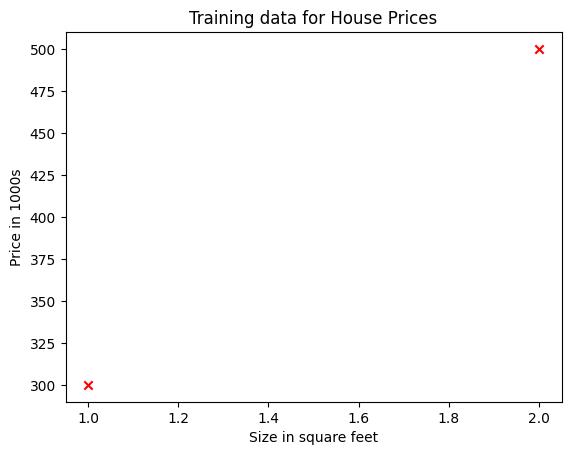

In [18]:
plt.scatter(x_train, y_train, marker='x', color='r')

plt.title('Training data for House Prices')
plt.ylabel('Price in 1000s')
plt.xlabel('Size in square feet')
plt.show()

### linear Regression Prediction Model

We want to predict the price of the house given the previous dataset according to its size.

Our Prediction Model is: $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

We say that all the prices we predict should follow this model, so we apply this model to our training data where

for $(x^{(0)})$ $$ f_{w,b}(x^{(0)}) = wx^{(0)} + b \tag{1}$$
for $(x^{(1)})$ $$ f_{w,b}(x^{(1)}) = wx^{(1)} + b \tag{1}$$


*Try This code bellow*

In [19]:
def compute_prediction_model(x, w, b):
    # X is our training data
    # w and b are model parameters.
    
    n = x.shape[0]  # size of the training data
    
    f_wb = np.zeros(n) # Model prediction for each data point
    
    for i in range(0,n):
        f_wb[i] = x[i] * w + b # y = wx + b
    
    return f_wb

def prodict_price(x, w, b):
    return x * w + b

### Plotting Function

In [20]:
def plotting(x, y, f_wb):
    
    plt.plot(x, f_wb, c='b',label='Our Prediction Model')
    plt.scatter(x, y, marker='x', color='r', label ='Training Data')

    plt.title('Training data for House Prices')
    plt.ylabel('Price in 1000s')
    plt.xlabel('Size in square feet')
    plt.legend()
    plt.show()

### Here is the Output and Plotting of Our Model:

[300. 500.]


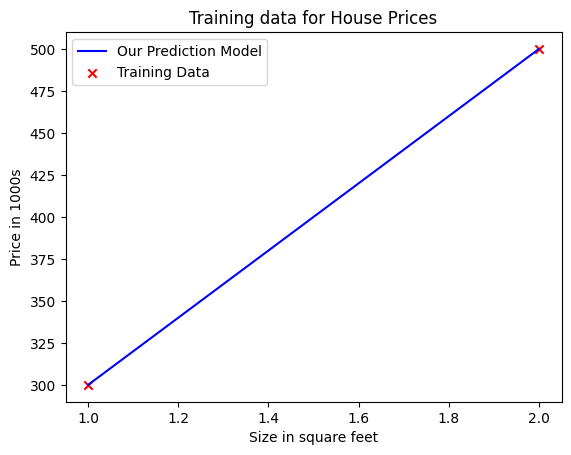

In [21]:
# Try to change the values of w and b to see how the model changes
w = 200.0
b = 100.0

f_wb = compute_prediction_model(x_train, w, b)
print(f_wb)

plotting(x_train, y_train, f_wb)

Now try to get the prediction model for a House with size 1.2 * 1000 $ft^{(2)}$

In [22]:
x_i = 1.2
price = prodict_price(x_i, w, b)
print(f'Price for house with size {x_i} is {price}')

Price for house with size 1.2 is 340.0


Let's see this on the plot

In [23]:
def predict_price_plotter(x, y, f_wb, x_i):
    price_i = prodict_price(x_i, w, b)
    plt.scatter(x_i, price_i, marker='o', color='r', label='Predicted Price')
    
    plt.plot(x, f_wb, c='b',label='Our Prediction Model')
    plt.scatter(x, y, marker='x', color='r', label ='Training Data')

    plt.axvline(x=x_i, color='g', linestyle='--', label=f'Size: {x_i}')
    plt.axhline(y=price_i, color='m', linestyle='--', label=f'Price: {price_i}')
    
    plt.title('Training data for House Prices')
    plt.ylabel('Price in 1000s')
    plt.xlabel('Size in square feet')
    plt.legend()
    plt.show()

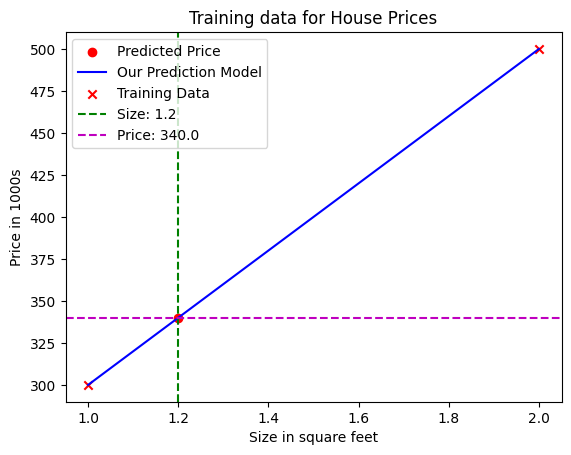

In [24]:
predict_price_plotter(x_train, y_train, f_wb, x_i)

# Cost Function

Cost Function is a measure how well your model is.
Here we need to know how our predicted price is close to the actual one.

In cost function we use Mean Squared Error to penalize the model prediction,

- Mean Square Error is as the following;
    $$(y - y^{-})^{(2)}$$ 
    where 
    - $y$ is the Actual Value.
    - $y^{-}$ is the predicted one.

- Cost Function is considered as following:

    $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 

        where
    $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
    
    - $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
    - $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
    - These differences are summed over all the $m$ examples and divided by `2n` to produce the cost, $J(w,b)$.  


There is the cost function code:

In [25]:
def cost_function(f_wb, y):
    n = y.shape[0]
    cost = 0.0
    
    for i in range(0,n):
        cost += (f_wb[i] - y[i]) ** 2
        
    return cost / (2 * n)
    

In [26]:
ww = 199.0 # best value of w is 200
bb = 100.0

f_wb = compute_prediction_model(x_train, ww, bb)
cost = cost_function(f_wb, y_train)
print(f'Cost: {cost}')

Cost: 1.25


Now we want to minimize cost function as possible

Here we use Gradient Descent Algorithm

# Gradient Descent

The Gradient Descent is an iterative algorithm to find the best model parameters w,b to minimize the cost function of the model.

The Gradient Descent Algorithm is as the following: 
    
$$
\begin{align} \;
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline
\end{align}
$$
You need to repeat this until convergence or for number of iterations.

where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{3} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{4} \\
\end{align}
$$


We will get Gradient Descent in 3 functions:

- `compute cost`: was implemented in the previous outline (Cost Function).
- `compute gradient` : implements the last 2 equations 4,5.
- `Gradient Descent` : get final parameters w,b from equations 1,2.


#### Compute gradient

In [27]:
def compute_gradient(f_wb, y, x):
    # f_wb is the model prediction for each point.
    # y is the target value.
    # x is the input data (training data).
    
    m = y.shape[0]  # size of the training data
    
    dw = 0.0
    db = 0.0
    
    for i in range(0, m):
        dw += (f_wb[i] - y[i]) * x[i]
        db += (f_wb[i] - y[i])
        
    dw /= m
    db /= m
    
    return dw, db

#### gradient descent


In [28]:
def gradient_descent(x, y , w_in, b, alpha, num_iterations):
    # x is the input data
    # y is the target value
    # w_in is the initial value of w
    # b is the initial value of b
    # alpha is the learning rate
    # num_iterations is the number of iterations
    
    w = w_in
    
    for i in range(0, num_iterations):
        f_wb = compute_prediction_model(x, w, b)
        dw, db = compute_gradient(f_wb, y, x)
        
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % ((num_iterations)/10) == 0:
            print(f'Iteration: {i}, Cost: {cost_function(f_wb, y)}')
            
    return w, b

Let's Test Our Code

Iteration: 0, Cost: 1208000.0
Iteration: 1000, Cost: 1909.5684244867869
Iteration: 2000, Cost: 1909.4984696518663
Iteration: 3000, Cost: 1909.4982088611644
Iteration: 4000, Cost: 1909.4982078889389
Iteration: 5000, Cost: 1909.498207885316
Iteration: 6000, Cost: 1909.4982078853056
Iteration: 7000, Cost: 1909.4982078853068
Iteration: 8000, Cost: 1909.4982078853075
Iteration: 9000, Cost: 1909.4982078853034
w: 244.98207885304544, b: 21.594982078861474
Cost: 1909.4982078853059


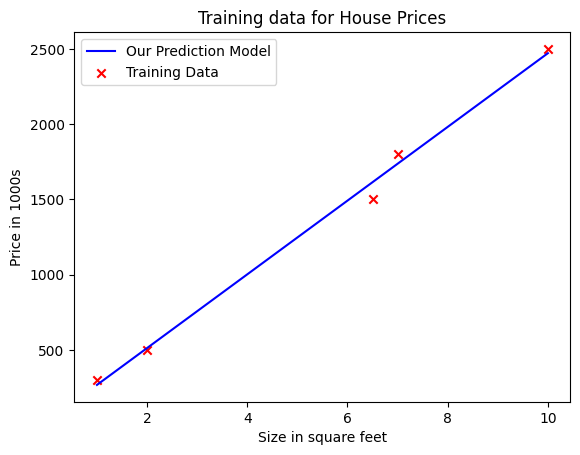

In [29]:
x_in = np.array([1.0, 2.0, 6.5, 7.0, 10.0])
y_in = np.array([300.0, 500.0, 1500.0, 1800.0, 2500.0])
alpha = 0.01
num_iterations = 10000

# Get Parameters
w, b = gradient_descent(x_in, y_in, 0.0, 0.0, alpha, num_iterations)
print(f'w: {w}, b: {b}')

# get the model prediction
f_wb = compute_prediction_model(x_in, w, b)

# get cost function of the model
cost = cost_function(f_wb, y_in)
print(f'Cost: {cost}')

# show results
plotting(x_in, y_in, f_wb)

Try the code to get a price of a house of size 5.0 * 1000 $ft^{2}$

Price for house with size 5.0 is 1246.5053763440887


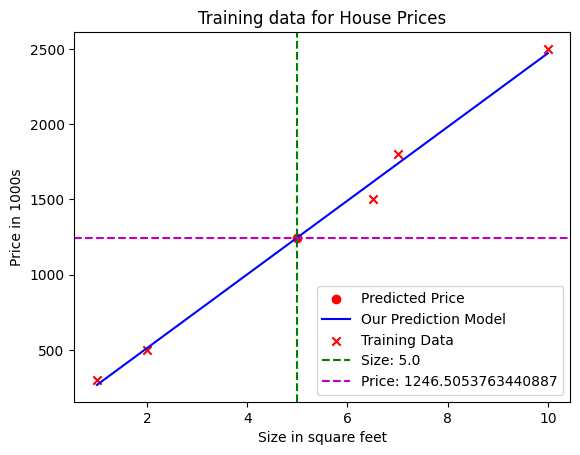

In [30]:
x_i = 5.0
price = prodict_price(x_i, w, b)
print(f'Price for house with size {x_i} is {price}')
predict_price_plotter(x_in, y_in, f_wb, x_i)